In [12]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torchvision.models as models
import json
from PIL import Image

In [7]:
classes = {}

with open('classes.json', 'r') as f:
    classes = json.load(f)

print(classes)

{'Ёнэ': 0, 'Азир': 1, 'Акали': 2, 'Акшан': 3, 'Алистар': 4, 'Амуму': 5, 'Анивия': 6, 'Ари': 7, 'Атрокс': 8, 'Аурелион Сол': 9, 'Афелий': 10, 'Бард': 11, "Бел'Вет": 12, 'Блицкранк': 13, 'Браум': 14, 'Брэнд': 15, 'Вай': 16, 'Варвик': 17, 'Варус': 18, 'Вейгар': 19, 'Вейн': 20, 'Векс': 21, "Вел'Коз": 22, 'Виего': 23, 'Виктор': 24, 'Владимир': 25, 'Волибир': 26, 'Вуконг': 27, 'Галио': 28, 'Гангпланк': 29, 'Гарен': 30, 'Гвен': 31, 'Гекарим': 32, 'Гнар': 33, 'Грагас': 34, 'Грейвз': 35, 'Дариус': 36, 'Джакс': 37, 'Джарван IV': 38, 'Джейс': 39, 'Джин': 40, 'Джинкс': 41, 'Диана': 42, 'Доктор Мундо': 43, 'Дрейвен': 44, 'Жанна': 45, 'Зайра': 46, 'Зак': 47, 'Зед': 48, 'Зерат': 49, 'Зери': 50, 'Зиггс': 51, 'Зилеан': 52, 'Зои': 53, 'Иверн': 54, 'Иллаой': 55, 'Ирелия': 56, 'Йорик': 57, "К'Санте": 58, "Ка'Зикс": 59, 'Каин': 60, "Кай'Са": 61, 'Калиста': 62, 'Камилла': 63, 'Карма': 64, 'Картус': 65, 'Кассадин': 66, 'Кассиопея': 67, 'Катарина': 68, 'Квинн': 69, 'Кейл': 70, 'Кейтлин': 71, 'Кеннен': 72, 'Ки

In [8]:
class ResNetModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.resnet = models.resnet50(pretrained=True)
    for param in self.resnet.parameters():
      param.requires_grad = False

    self.resnet.fc = nn.Sequential(
        nn.Linear(2048, 163),
    )
  
  def forward(self, x):
    return self.resnet(x)

In [28]:
model = ResNetModel()
model.load_state_dict(torch.load('quick_lol.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

# Aphelios test

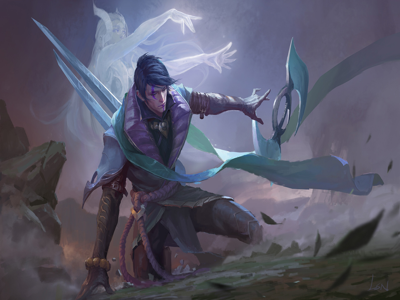

In [34]:
#Source: https://www.artstation.com/artwork/mDzQvv
image = Image.open('aphelios_test.jpg').convert('RGB').resize((400, 300))
image

In [35]:
model.eval()
image = transforms.ToTensor()(image).unsqueeze(0)
predict = model(image).argsort(dim=1, descending=True)
for i in predict[0][:10]:
    print(list(classes.keys())[i])

Мастер Йи
Афелий
Нуну и Виллумп
Ясуо
Дрейвен
Сенна
Акали
Диана
Ксин Жао
Сорака


# Ahri test

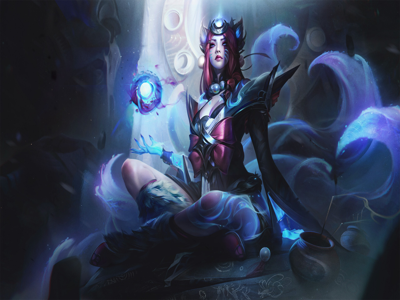

In [40]:
#Source: https://www.artstation.com/artwork/OGE5Z8
image = Image.open('ahri_test.jpg').convert('RGB').resize((400, 300))
image

In [41]:
image = transforms.ToTensor()(image).unsqueeze(0)
predict = model(image).argsort(dim=1, descending=True)
for i in predict[0][:10]:
    print(list(classes.keys())[i])

Эвелинн
Ари
Ка'Зикс
Иллаой
Экко
Джин
Райз
Нидали
Шен
Виктор
